<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#-Homework-2-(Topics-5-7:-Groupby,-Merge,-Visualization)" data-toc-modified-id="-Homework-2-(Topics-5-7:-Groupby,-Merge,-Visualization)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><center> Homework 2 (Topics 5-7: Groupby, Merge, Visualization)</center></a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Task-0." data-toc-modified-id="Task-0.-1.0.0.1"><span class="toc-item-num">1.0.0.1&nbsp;&nbsp;</span>Task 0.</a></span></li><li><span><a href="#Task-1." data-toc-modified-id="Task-1.-1.0.0.2"><span class="toc-item-num">1.0.0.2&nbsp;&nbsp;</span>Task 1.</a></span></li><li><span><a href="#Task-2:" data-toc-modified-id="Task-2:-1.0.0.3"><span class="toc-item-num">1.0.0.3&nbsp;&nbsp;</span>Task 2:</a></span></li><li><span><a href="#Task-3:" data-toc-modified-id="Task-3:-1.0.0.4"><span class="toc-item-num">1.0.0.4&nbsp;&nbsp;</span>Task 3:</a></span></li><li><span><a href="#Task-4:" data-toc-modified-id="Task-4:-1.0.0.5"><span class="toc-item-num">1.0.0.5&nbsp;&nbsp;</span>Task 4:</a></span></li><li><span><a href="#Task-5:" data-toc-modified-id="Task-5:-1.0.0.6"><span class="toc-item-num">1.0.0.6&nbsp;&nbsp;</span>Task 5:</a></span></li><li><span><a href="#Вопросы:" data-toc-modified-id="Вопросы:-1.0.0.7"><span class="toc-item-num">1.0.0.7&nbsp;&nbsp;</span>Вопросы:</a></span></li><li><span><a href="#Task-6:" data-toc-modified-id="Task-6:-1.0.0.8"><span class="toc-item-num">1.0.0.8&nbsp;&nbsp;</span>Task 6:</a></span></li><li><span><a href="#Вопросы:" data-toc-modified-id="Вопросы:-1.0.0.9"><span class="toc-item-num">1.0.0.9&nbsp;&nbsp;</span>Вопросы:</a></span></li></ul></li></ul></li></ul></li></ul></div>

# <center> Homework 2 (Topics 5-7: Groupby, Merge, Visualization)

In [15]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import tqdm

Ещё раз (как и в задании 1) считайте в переменные tr_mcc_codes, tr_types, transactions и customers_gender_train. В transactions опять считайте только первые 1000000 строк.

In [16]:
### Type your code here

tr_mcc_codes = pd.read_csv('C:/Users/Ренаточка/Desktop/Анализ данных/tr_mcc_codes.csv', sep=';')

tr_types = pd.read_csv('C:/Users/Ренаточка/Desktop/Анализ данных/tr_types.csv', sep=';')

transactions = pd.read_csv('C:/Users/Ренаточка/Desktop/Анализ данных/transactions.csv', sep=',')

gender_train = pd.read_csv('C:/Users/Ренаточка/Desktop/Анализ данных/gender_train.csv', sep=';')

#### Task 0.
Соедините transactions с всеми остальными таблицами (tr_mcc_codes, tr_types, gender_train). Причём с customers_gender_train необходимо смёрджиться с помощью left join, а с оставшимися датафреймами - через inner.
После получения результата таблицы gender_train, tr_types, tr_mcc_codes можно удалить. В результате соединения датафреймов должно получиться 999584 строки.

Алгоритм решения:
1) Сперва для корретного соединения таблиц нужно определить названия столбцов для соединения, используем метод columns, который позволяет получить название столбцов. Чтобы они соединились, для этого нужно чтоб совпадали в основной и присоединяемой таблице
2) Получаем названия столбцов можно определить порядок соединения. Первыми соединяются transactions и gender_train по столбцу customer_id, с помошью левого соединения (how='left'). Для проведения операций соединения датафреймов используется библиотека pandas. Затем соединяем merged_data (результирующая таблица) и tr_mcc_codes по столбцу mcc_code и merged_data с tr_types по столбцу tr_type

In [8]:
# Проверка названий столбцов
print("gender_train ", gender_train.columns)
print("tr_types ", tr_types.columns)
print("tr_mcc_codes ", tr_mcc_codes.columns)
print("transactions", transactions.columns)


gender_train  Index(['customer_id,gender'], dtype='object')
tr_types  Index(['tr_type', 'tr_description'], dtype='object')
tr_mcc_codes  Index(['mcc_code', 'mcc_description'], dtype='object')
transactions Index(['customer_id', 'tr_datetime', 'mcc_code', 'tr_type', 'amount',
       'term_id'],
      dtype='object')


In [17]:
### Type your code here
# Преобразование типа данных столбца 'customer_id' в DataFrame transactions
transactions['customer_id'] = transactions['customer_id'].astype(str)

# Затем объединяем
merged_data = pd.merge(transactions, gender_train, how='left', on='customer_id')
merged_data = pd.merge(merged_data, tr_mcc_codes, how='inner', on='mcc_code')
merged_data = pd.merge(merged_data, tr_types, how='inner', on='tr_type')

# Проверка размера итоговой таблицы
print(merged_data.shape)

(6846580, 9)


#### Task 1.
1. Определите модуль разницы между средними тратами женщин и мужчин (трата - отрицательное значение amount). (*)

Выведите ответ в виде вещественного числа, округлённого до двух знаков после запятой, отделив дробную часть точкой в формате "123.45"

##### Пояснения:
(\*) Если в результате для мужчин получились значения [-1,-3,-5], а для женщин [-1,-2,-3],  
то модуль разницы между средними арифметическими -3 и -2 будет равен 1.

(\**) Обратите внимание, что для вычисления модуля разности точных знаний о том,  
какой класc относится к мужчинам, а какой - к женщинам, пока не требуется.

(\***) Округление не нужно производить отдельно по средним тратам женщин и мужчин, а только в самом конце, когда получите значение модуля разницы трат.

Алгоритм решения:
1) Производим фильтрацию данных в полученной ранее общей таблице
2) Создаем новый DataFrame под названием negative_transactions, в котором содержатся только те строки из DataFrame merged_data, где значение столбца 'amount' меньше нуля. merged_data['amount'] обращается к столбцу 'amount' в DataFrame merged_data, и затем используется условие < 0 для фильтрации только тех строк, у которых значение в этом столбце меньше нуля
3) оздаются два новых DataFrame: women_transactions и men_transactions. В первой строке кода используется фильтрация строк DataFrame negative_transactions, где значение столбца 'gender' равно 'F'. Полученный DataFrame записывается в переменную women_transactions. Во второй строке кода используется аналогичная операция фильтрации, но для значений столбца 'gender', равных 'M'. Полученный DataFrame записывается в переменную men_transactions
4) Вычисляем средние значения расходов для женских и мужских транзакций в DataFrame women_transactions и men_transactions соответственно. В первой строке кода вызывается метод .mean() для столбца 'amount' в DataFrame women_transactions, что позволяет вычислить среднее значение всех значений в этом столбце. Результат сохраняется в переменной avg_women_expenses. Аналогично, во второй строке кода метод .mean() применяется к столбцу 'amount' в DataFrame men_transactions, и среднее значение сохраняется в переменную avg_men_expenses
5) Находим разницу этих средних значений С помощью функции abs() находим модуль полученного числа С помощью функции round производим округление числа до 2 знаков после запятой

In [18]:
### Type your code here
# Отфильтровать данные так, чтобы учесть только отрицательные значения amount
negative_transactions = merged_data[merged_data['amount'] < 0]

# Разделить отфильтрованные данные на две группы: женщины и мужчины
women_transactions = negative_transactions[negative_transactions['gender'] == 'F']
men_transactions = negative_transactions[negative_transactions['gender'] == 'M']

# Вычислить средние траты для каждой группы
avg_women_expenses = women_transactions['amount'].mean()
avg_men_expenses = men_transactions['amount'].mean()

# Найти разницу между средними тратами
difference = avg_women_expenses - avg_men_expenses

# Модуль разницы
abs_difference = abs(difference)

# Округление до двух знаков после запятой
rounded_difference = round(abs_difference, 2)

print(rounded_difference)

nan


#### Task 2:
1. Создайте новый столбец - mcc_code+tr_type, сконкатенировав значения из соответствующих столбцов. (\*)
2. Оставьте только наблюдения с отрицательным значением amount. Посчитайте дисперсию по категориям получившегося столбца mcc_code+tr_type, в которых количество наблюдений >= 10. 
3. Определите отношение максимальной дисперсии к минимальной.

Выведите ответ в виде вещественного числа, округлённого до ближайшего целого в формате "123456" без дробной части.

##### Пояснения:
(\*) Для конкатенации значений в столбцах можно использовать метод .astype(str) для серии и складывать соответствующие серии. Либо же применять apply к строкам датафрейма, прописывая логику преобразования и конкатенации значений внутри.

(\**) Для одновременного подсчета количества наблюдений и дисперсии по категориям можно воспользоваться функцией .agg()

Алгоритм решения:
1) Вначале создаем новый столбец "mcc_code+tr_type" путем соединения значений из двух соответствующих столбцов. Для того чтобы это сделать применяем метод astype(str), который приводит поля к одному типу (строка), чтобы объединения не вызывало ошибок
2) Затем снова отбираем только отрицательные значения столбца amount. Вычисляем дисперсию на основе полученных данных. для этого используем:

а) groupby('mcc_code+tr_type'): Этот метод группирует данные по уникальным значениям столбцов 'mcc_code' и 'tr_type'. Он создает группы данных, где каждая группа содержит строки, у которых значения в указанных столбцах совпадают.

б) ['amount']: Этот оператор выбирает столбец с названием 'amount' из группированного объекта. В данном случае, это столбец, содержащий суммы транзакций.

в) agg(['var', 'size']): Этот метод агрегирует данные внутри каждой группы, применяя указанные агрегирующие функции. В данном случае, используются функции var (дисперсия) и size (количество элементов). Результатом будет новый DataFrame с двумя столбцами: 'var' и 'size'.

г) query('size >= 10'): Этот метод фильтрует строки в DataFrame, оставляя только те, для которых условие 'size >= 10' истинно. То есть, оставляются только группы данных, содержащие 10 или более элементов.

3) Последнее действие - найти отношение максимума к минимуму дисперсии.

In [19]:
### Type your code here
# 1. Создание нового столбца - mcc_code+tr_type, сконкатенировав значения из соответствующих столбцов
merged_data['mcc_code+tr_type'] = merged_data['mcc_code'].astype(str) + merged_data['tr_type'].astype(str)

# 2. Оставление только наблюдений с отрицательным значением amount
negative_amount = merged_data[merged_data['amount'] < 0]

# 3. Вычисление дисперсии по категориям mcc_code+tr_type, в которых количество наблюдений >= 10, и определение отношения максимальной дисперсии к минимальной
result = negative_amount.groupby('mcc_code+tr_type')['amount'].agg(['var', 'size']).query('size >= 10')

# Подсчет отношения максимальной дисперсии к минимальной
ratio = result['var'].max() / result['var'].min()

# Вывод ответа
print(round(ratio))  # округление до ближайшего целого числа

73763880


#### Task 3:
1. По всем типам транзакций рассчитайте максимальную сумму прихода на карту (из строго положительных сумм по столбцу amount) отдельно для мужчин и женщин (назовите ее "max_income"). Оставьте по 5 транзакций для мужчин и для женщин, наименьших среди всех транзакций по полученным значениям "max_income". (\*)
2. Выделите среди них те, которые встречаются одновременно и у мужчин, и у женщин:
    - 1) Покупка. POS ТУ СБ РФ	
    - 2) Списание после проведения претензионной работы	
    - 3) Плата за получение наличных. Россия	
    - 4) Перевод на карту/ с карты через АТМ (со взиманием комиссии с отправителя) по счету в овердрафте	
    - 5) Плата за получение наличных в АТМ. Россия	 
    - 6) Наличные. Зарубеж. банк	
    - 7) Возврат покупки. POS ТУ Россия

##### Пояснения:
(\*) Если максимальные суммы приходов по каким-то типам были равны [1,2,3,4,5,6,7,8], то 5 минимальных из них: [1,2,3,4,5]

Алгоритм решения:
1) Чтобы рассчитать максимальную сумму прихода на карту для мужчин и женщин отдельно, нужно отфильтровать транзакции с положительными суммами в столбце "amount". Создаем новый DataFrame под названием positive_transactions, в котором содержатся только те строки из DataFrame merged_data, где значение столбца 'amount' меньше нуля. merged_data['amount'] обращается к столбцу 'amount' в DataFrame merged_data, и затем используется условие < 0 для фильтрации только тех строк, у которых значение в этом столбце меньше нуля
2) Затем сгруппировать данные по полу (gender) и типу транзакции (tr_description), чтобы найти максимальный приход (['amount'].max()) для каждой группы. Потом отсортировываем данные по возрастанию (sort_values('amount'))
3) Потом нужно выбрать 5 наименьших максимальных приходов как для мужчин ([max_income_sorted['gender'] == 'M'].head(5)), так и для женщин ([max_income_sorted['gender'] == 'F'].head(5)), и идентифицировать транзакции, которые встречаются в обеих группах. (.merge(smallest_max_income_women, on='tr_description'))
4) Выводим результат

In [20]:
### Type your code here
# Отфильтровать транзакции с положительными суммами
positive_transactions = merged_data[merged_data['amount'] > 0]

# Сгруппировать данные по полу и типу транзакции и рассчитать максимальный приход
max_income = positive_transactions.groupby(['gender', 'tr_description'])['amount'].max().reset_index()

# Отсортировать данные по максимальному приходу в порядке возрастания
max_income_sorted = max_income.sort_values('amount')

# Выбрать 5 наименьших максимальных приходов для мужчин и женщин
smallest_max_income_men = max_income_sorted[max_income_sorted['gender'] == 'M'].head(5)
smallest_max_income_women = max_income_sorted[max_income_sorted['gender'] == 'F'].head(5)

# Найти транзакции, которые встречаются в обеих группах
common_transactions = smallest_max_income_men.merge(smallest_max_income_women, on='tr_description')

# Вывести общие транзакции
print(common_transactions['tr_description'])


Series([], Name: tr_description, dtype: object)


#### Task 4:
1. Выделите из поля tr_datetime относительный день tr_day (первое число до точного времени). (\*)
2. Отфильтруйте строки таким образом, чтобы оставить только те транзакции, у которых в соответствующий относительный день tr_day количество уникальных MCC кодов при транзакциях было больше 75 (можно воспользоваться функцией nunique())
3. Сгруппируйте полученный отфильтрованный датафрейм по MCC коду и полу, после чего, пронализировав результат, выберите верные варианты ответов ниже (\**): 
    - 1) gender == 0 - женщины, gender == 1 - мужчины
    - 2) gender == 1 - женщины, gender == 0 - мужчины
    - 3) Абсолютное значение медианы с типом "Флористика" (расходов/приходов) у мужчин выше той же медианы у женщин
    - 4) Абсолютное значение медианы женских трат (расходов/приходов) на ценные бумаги выше мужских
    - 5) Абсолютное значение медианы женских трат (расходов/приходов) в категории "Бары, коктейль-бары, дискотеки, ночные клубы и таверны — места продажи алкогольных напитков" ниже мужских
    
##### Пояснения:
(\*) Для того, чтобы выделить всё, что стоит до первого пробела, можо использовать строковые методы для датафрейма - .str.split(), например. Либо же реализовывать логику выделения подстроки с помощью метода apply. <br>
(\**) Понять, какой класс к какому типу транзакций (мужские/женские) относится можно, если поизучать типичные для мужчин/женщин категории и сравнить средние/медианы расходов и/или приходов в них.

Алгоритм решения:
1) Используем метод строковых операций в pandas. (str.split().str[0]),ч тобы выделить относительный день из поля tr_datetime
2) Затем нужно отфильтровать строки, чтобы оставить только те транзакции, у которых количество уникальных MCC кодов больше 75 для соответствующего относительного дня tr_day (groupby('tr_day').filter(lambda x: x['mcc_code'].nunique() > 75)).
3) Потом сгруппируем полученный отфильтрованный датафрейм по MCC коду и полу (groupby(['mcc_code', 'gender'])) и проанализируем результаты
4) Выводим результат

In [18]:
### Type your code here
# Выделение относительного дня из tr_datetime
merged_data['tr_day'] = merged_data['tr_datetime'].str.split().str[0]

# Фильтрация транзакций по количеству уникальных MCC кодов
filtered_data = merged_data.groupby('tr_day').filter(lambda x: x['mcc_code'].nunique() > 75)

# Группировка по MCC коду и полу
grouped_data = filtered_data.groupby(['mcc_code', 'gender'])

# Анализ результатов
analysis_results = grouped_data['amount'].median().abs()

# Вывод результатов
print(analysis_results)

Series([], Name: amount, dtype: float64)


#### Task 5:
1. Разбейте расходы (отрицательные значения сумм) на 5 бакетов amount_bucket равного объёма (с помощью pd.qcut), разбив все траты на категории 'Very High', 'High', 'Middle', 'Low', 'Very Low'. (\*)
2. Оставшиеся неотрицательные траты отнесите к категории 'Income'.
(воспользуйтесь функцией .cat.add_categories('Income') для того, чтобы добавить новую категорию 'Income' к категориям 'Very High', 'High', 'Middle', 'Low', 'Very Low', а затем заполните пустые значения новой категорией).
3. Из поля tr_datetime выделите час tr_hour, в который произошла транзакция, как первые 2 цифры до ":". (\**)
3. После этого постройте сводную таблицу, значениями в которой является пол gender, индексы - tr_hour, столбцы - amount_bucket.
4. Отрисуйте полученные результаты, передав их в функцию plot_pivot_table, расположенную ниже.
5. Выберите верные ответы на вопросы ниже.

#### Вопросы:
    - 1) Ночные поступления денег (01-05 часов) в более чем 85% случаев являются мужскими.
    - 2) Посмотрев на долю мужчин в поступлениях средств (Income), можно сделать вывод, что количество поступлений средств женщинам в целом больше, чем мужчинам.
    - 3) Самые низкие траты в 3 часа ночи осуществляются в более 70% случаев женщинами.
    - 4) Существуют особые часы в мелких тратах, когда женщины тратят намного больше мужчин (>80%)
    - 5) Посмотрев на долю мужчин в максимальных тратах средств (Very High), можно сделать вывод, что количество высоких трат в каждый возможный час мужчин больше, чем у женщин.

##### Пояснения:
(\*) Обратите внимание, что в категории Very High Должны оказаться максимальные по модулю отрицательные транзакции. <br>
(\**) Например, для строки "0 10:23:26" час будет равен 10, а для строки "6 07:08:31"- 07. Можно воспользоваться функциями str.split() или str.find() и 
функцией .apply(lambda x: x[])

#### Ответы на вопросы: 1) и 5)


Алгоритм решения:
1) Используем функцию pd.qcut() для разделения значений столбца amount на 5 бакетов (q=5). Затем выбираем только отрицательные значения суммы транзакций (merged_data.loc[merged_data['amount'] < 0, 'amount']) и присваиваем им метки бакетов ['Very Low', 'Low', 'Middle', 'High', 'Very High']. Результат сохраняется в столбце amount_bucket
2) Используем метод .cat.add_categories() для добавления новой категории 'Income' к столбцу amount_bucket. Затем мы используем метод .fillna() для заполнения пустых значений в столбце amount_bucket значением 'Income'. Это позволяет нам отметить положительные траты как 'Income'
3) Используем методы строк .str.split() и .str[:2], чтобы выделить час из значения столбца tr_datetime. Затем разделяем строку по пробелу и выбираем первый элемент после разделения (час). Результат сохраняется в столбце tr_hour
4) Используем метод .pivot_table() для создания сводной таблицы. Затем указываем, что индексом должен быть столбец tr_hour, столбцами - amount_bucket, значениями - gender, и агрегирующей функцией - 'count' (подсчет количества значений). Результат сохраняется в переменной pivot_table
5) Используем библиотеку seaborn и matplotlib для отрисовки тепловой карты (heatmap). Затем задаем размер фигуры, цветовую схему (cmap="YlGnBu"), добавляем аннотации с форматированием чисел (fmt='.3g') и задаем размеры шрифтов для меток осей и заголовка. Вызываем plt.show(), чтобы отобразить график
6) Вызываем функцию plot_pivot_table() и передаем ей сводную таблицу pivot_table в качестве аргумента, что приводит к отрисовке тепловой карты на основе сводной таблицы.

In [21]:
def plot_pivot_table(pivot_table):
    plt.figure(figsize=(9, 11))
    sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, 
                fmt='.3g', annot_kws={"size": 14, "fontsize": 14})
    plt.xticks(fontsize=15)
    plt.yticks(rotation=0, fontsize=15)
    plt.xlabel('Bucket', size=18)
    plt.ylabel('Hour', fontsize=18)
    plt.title('Gender analysis per bucket and hour', fontsize=20)
    plt.show()

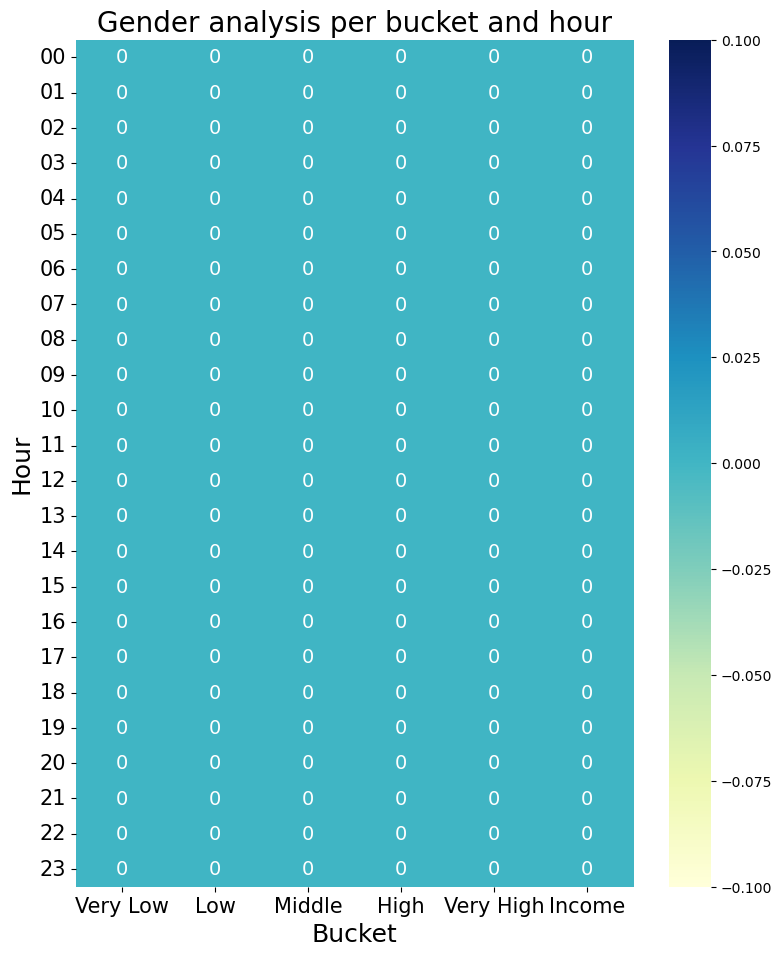

In [23]:
# Type your code here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Разбиение расходов на 5 бакетов amount_bucket
merged_data['amount_bucket'] = pd.qcut(merged_data.loc[merged_data['amount'] < 0, 'amount'], q=5, labels=['Very Low', 'Low', 'Middle', 'High', 'Very High'])

# Добавление новой категории 'Income' и заполнение пустых значений
merged_data['amount_bucket'] = merged_data['amount_bucket'].cat.add_categories('Income').fillna('Income')

# Выделение часа транзакции из tr_datetime
merged_data['tr_hour'] = merged_data['tr_datetime'].str.split().str[1].str[:2]

# Построение сводной таблицы
pivot_table = merged_data.pivot_table(index='tr_hour', columns='amount_bucket', values='gender', aggfunc='count')

# Функция для отрисовки сводной таблицы
def plot_pivot_table(pivot_table):
    plt.figure(figsize=(9, 11))
    sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt='.3g', annot_kws={"size": 14})
    plt.xticks(fontsize=15)
    plt.yticks(rotation=0, fontsize=15)
    plt.xlabel('Bucket', size=18)
    plt.ylabel('Hour', fontsize=18)
    plt.title('Gender analysis per bucket and hour', fontsize=20)
    plt.show()


# Отрисовка сводной таблицы
plot_pivot_table(pivot_table)

#### Task 6:
1. Измените тип поля tr_day на int.
2. Выберите из transactions все MCC коды, которые встретились в выборке более чем 60000 раз.
3. Сгруппируйте отфильтрованный датафрейм по дню и MCC-коду, получая средние значения суммы amount.  
4. Далее отрисуйте зависимость средних сумм (может пригодится метод unstack()) по каждому из MCC-кодов по дням.
5. Выберите верные ответы на вопросы ниже.

#### Вопросы:
    - 1) 2 из полученных MCC-кодов связаны с финансовыми институтами
    - 2) 2 MCC кода, связанные со снятием наличности имеют в целом разные знаки (в одном случае почти везде - траты, в другом - пополнения)
    - 3) Бакалейные магазины обладают максимальными средними тратами среди выбранных MCC-кодов
    - 4) Денежные переводы имеют как минимум 3 явных минимума средних
    - 5) Категория "Звонки с использованием телефонов, считывающих магнитную ленту" имеет визуально очень большую дисперсию. 

#### Ответы на вопросы: 1)  и 4) 

Алгоритм решения:
1) Преобразуем тип данных столбца tr_day в целочисленный (int), чтобы можно было правильно выполнять операции с этим столбцом - .astype(int)
2) Используется метод value_counts() для подсчета количества вхождений каждого уникального значения в столбце mcc_code. Затем выбираем только те значения mcc_code, которые встречаются более 60000 раз, и сохраняем их в переменную popular_mcc (merged_data['mcc_code'].value_counts() > 60000)
3) Используем метод isin() для фильтрации датафрейма merged_data и выбираем только те строки, в которых значение столбца mcc_code присутствует в переменной popular_mcc
4) Резльтат фильтрации сохраняется в новом датафрейме filtered_merged_data
5) Используем метод groupby() для группировки датафрейма filtered_merged_data по столбцам tr_day и mcc_code. Затем мы выбираем столбец amount и вычисляем среднее значение (mean()) для каждой группы
6) Результат сохраняется в объекте grouped_merged_data
7) Используем метод unstack() для преобразования объекта grouped_merged_data в сводную таблицу, где значениями являются средние суммы, индексы - дни (tr_day), а столбцы - MCC-коды
8) Отрисовываем график, используя метод plot(). Добавляем подписи осей и заголовок графика, а также легенду с названиями MCC-кодов
9) Вызываем plt.show(), чтобы отобразить график

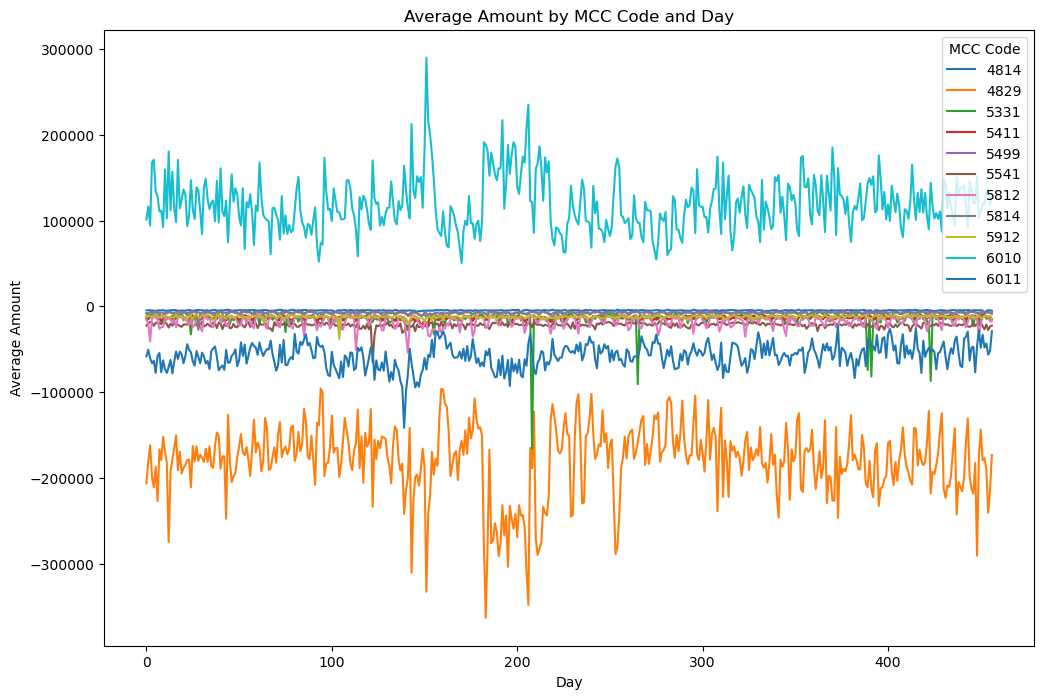

In [29]:
# Type your code here
# Изменение типа поля tr_day на int
merged_data['tr_day'] = merged_data['tr_day'].astype(int)

# Выбор MCC-кодов, которые встречаются более 60000 раз
popular_mcc = merged_data['mcc_code'].value_counts()[merged_data['mcc_code'].value_counts() > 60000].index

# Фильтрация датафрейма по выбранным MCC-кодам
filtered_merged_data = merged_data[merged_data['mcc_code'].isin(popular_mcc)]

# Группировка по дню и MCC-коду, получение средних значений суммы amount
grouped_merged_data = filtered_merged_data.groupby(['tr_day', 'mcc_code'])['amount'].mean()

# Отрисовка зависимости средних сумм по каждому из MCC-кодов по дням
pivot_table = grouped_merged_data.unstack()
pivot_table.plot(figsize=(12, 8))
plt.xlabel('Day')
plt.ylabel('Average Amount')
plt.title('Average Amount by MCC Code and Day')
plt.legend(title='MCC Code')

plt.show()